In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples,silhouette_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
# Kaggle의 Customer Clustering dataset 사용
df = pd.read_csv('Customer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df = df.drop(['ID'],axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


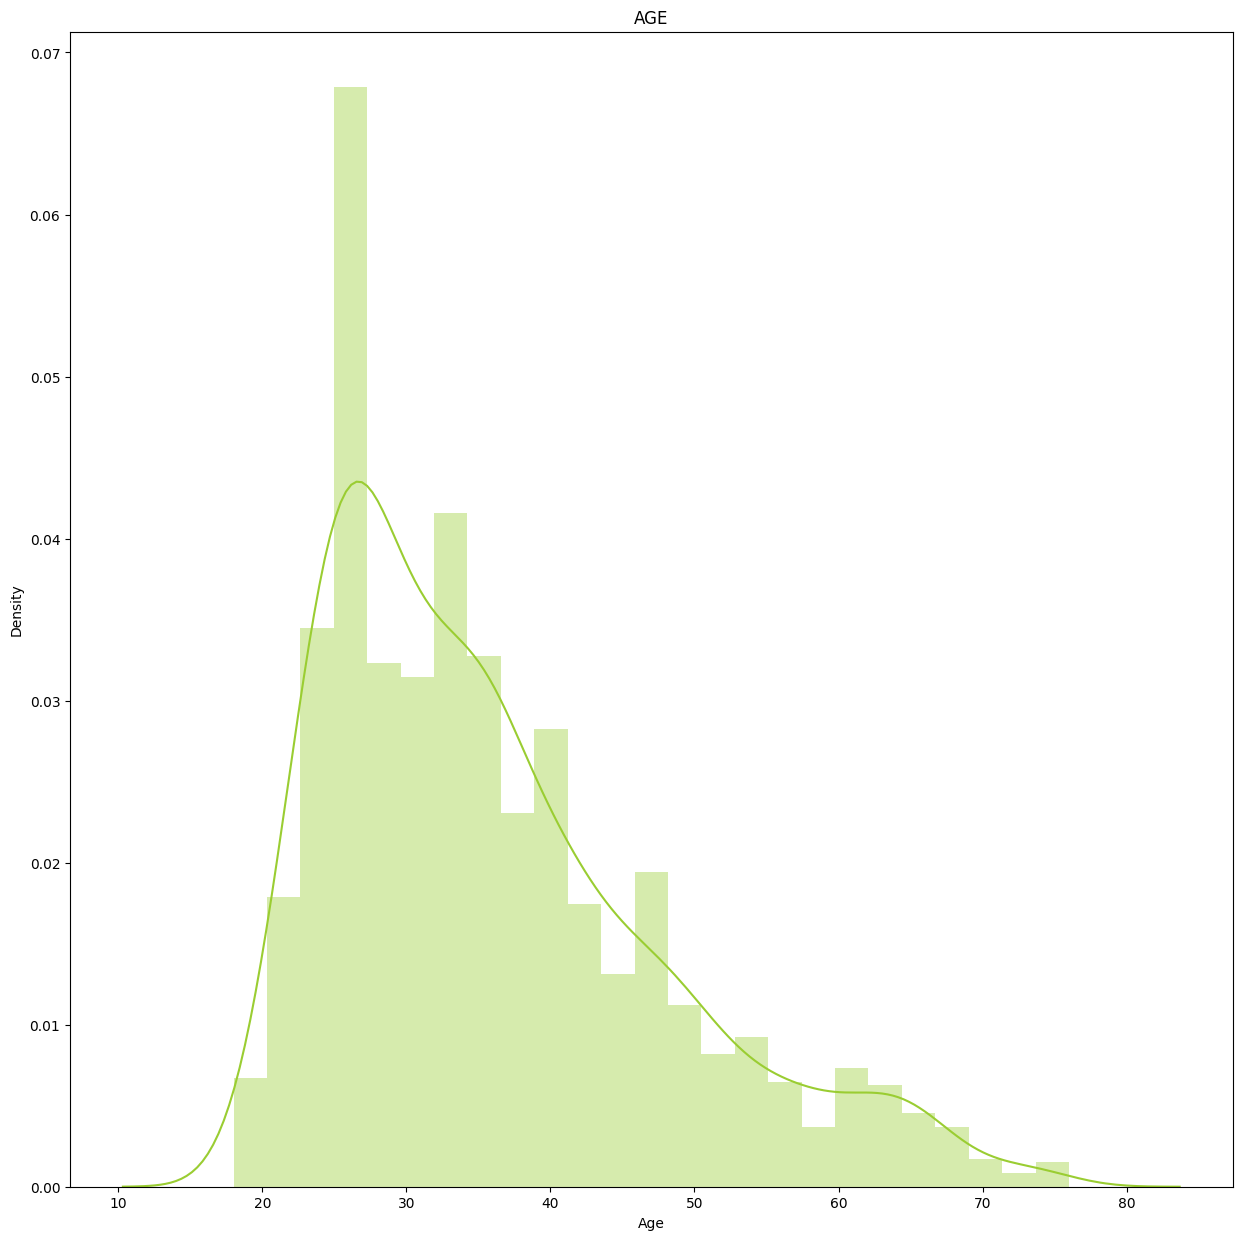

In [6]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize = (15,15))
sns.distplot(df['Age'],color = 'yellowgreen')
plt.title('AGE')
plt.show()

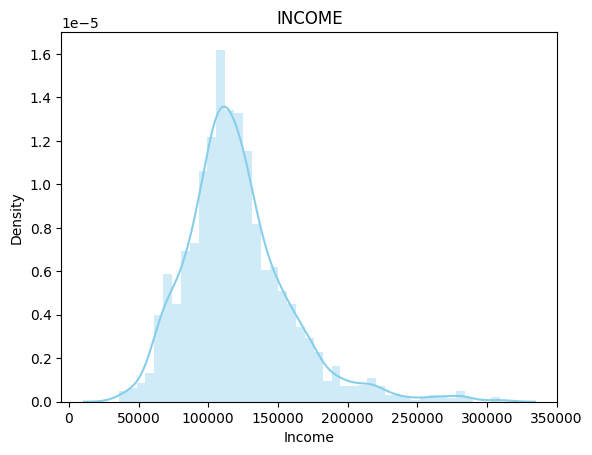

In [7]:
sns.distplot(df['Income'],color = 'skyblue')
plt.title('INCOME')
plt.show()

In [8]:
scaler = MinMaxScaler()
age_income = df[['Age','Income']]
scaled_age_income = scaler.fit_transform(age_income)
data = df.copy()
data[['Age','Income']] = scaled_age_income
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [9]:
sex_counts = df['Sex'].value_counts()
marital_counts = df['Marital status'].value_counts()
education_counts = df['Education'].value_counts()
occupation_counts = df['Occupation'].value_counts()
settlement_counts = df['Settlement size'].value_counts()

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

fig = make_subplots(rows=3,cols=2)

category = [sex_counts,marital_counts,
            education_counts,occupation_counts,
            settlement_counts]
category_label = [label for label in df.columns if label not in age_income.columns]
for i, col in enumerate(category_label):
    fig.add_trace(
        go.Bar(
            x = category[i].index.astype('str'),
            y = category[i].values,
            marker_color = px.colors.sequential.Teal,
            name=col),
            row = int(i/2)+1, col = int(i%2)+1)
 
fig.show()

In [11]:
# Gaussian mixture model
def gmm_silhouette(data):
    cluster_lists = [3,4,5,6,7]
    scores = []
    for idx,cluster in enumerate(cluster_lists):
        cluster = GaussianMixture(n_components=cluster,random_state=42)
        cluster_labels = cluster.fit_predict(data)
        score = silhouette_score(data,cluster_labels)
        scores.append(score)
    return scores


scores = gmm_silhouette(data)
print(scores)

[0.26640839818930023, 0.2951737763612689, 0.2307016442516732, 0.24388461863240393, 0.2695592872732055]


In [12]:
def kmeans_silhouette(data):
    cluster_lists = [3,4,5,6,7]
    scores = []
    for idx,cluster in enumerate(cluster_lists):
        cluster = KMeans(n_clusters=cluster,n_init=10,random_state=42)
        cluster_labels = cluster.fit_predict(data)
        score = silhouette_score(data,cluster_labels)
        scores.append(score)
    return scores
scores = kmeans_silhouette(data)
print(scores)


[0.3042197561131009, 0.291688592193938, 0.30089330913648393, 0.3036135962189705, 0.3318256090464166]


In [13]:
# score이 너무 낮아서, 연봉에 대한 정규화를 다른 방법으로 시도
from sklearn.preprocessing import PowerTransformer

data2 = df.copy()
scaled = PowerTransformer().fit_transform(data2['Income'].values.reshape(-1,1))
data2['Income'] = scaled

scores_g = gmm_silhouette(data2)
print(scores_g)

scores_k = kmeans_silhouette(data2)
print(scores_k)

[0.3718770330033485, 0.10028733945660823, 0.03417566378830498, -0.05121456187996704, -0.08548611941045757]
[0.5411875070830238, 0.5135910634167804, 0.4611994326684654, 0.41970588782008234, 0.3917977141781104]


In [14]:
pca = PCA(n_components = 2, random_state = 42)
pca_transformed = pca.fit_transform(data2)

pca_df = pd.DataFrame(pca_transformed,columns=['feature1','feature2'])

In [15]:
print(pca.components_)
max_feature1 = np.argmax(pca.components_[0])
max_feature2 = np.argmax(pca.components_[1])

print()
most = data2.columns[[max_feature1,max_feature2]]
print(most)

[[-0.00778657 -0.00907483  0.99890248  0.03349871  0.02865894  0.00602609
   0.00842852]
 [-0.11620417 -0.02873424 -0.02810418 -0.02049179  0.7149663   0.44467134
   0.52493024]]

Index(['Age', 'Income'], dtype='object')


In [16]:
# Age에 대한 정규화를 하지않았음. 가장 큰 영향이기에 정규화 한번 해보기
# standard, minmax, qcut,log 등 사용하면 score이 0.3이 max
# data2에서 kmeans, cluster = 3을 model로 설정
cluster = KMeans(n_clusters=3,n_init=10,random_state=42)
cluster_labels = cluster.fit_predict(data2)

fig = px.scatter(pca_df,x='feature1',y='feature2',color=cluster_labels)
fig.show()
